###Question 9

In [0]:
import numpy as np
import matplotlib.pyplot as plt

import scipy
from scipy.optimize import minimize_scalar

In [0]:
A = np.array([[2, 1], [1, 20]])
b = np.array([5, 22])
fu = lambda u: 0.5*u@A@u.T-b@u.T
df = lambda u : u@A-b

In [0]:
def f_point(point):
    x, y = point.T
    return x**2 + x*y + 10*y**2 - 22*y - 5*x

In [0]:
def plot_function(func, N=100, lims=(-1, 10.5), figsize=(8, 8)):
    xlist = np.linspace(*lims, N+1)
    ylist = np.linspace(*lims, N+1)
    x, y = np.meshgrid(xlist, ylist)
    plt.figure(figsize=figsize)
    xy = np.hstack((x.reshape(-1, 1), y.reshape(-1, 1)))
    f1 = func(xy).reshape(N+1, N+1)
    plt.contourf(x, y, f1)
    plt.title(r'$f = x^2 + xy + 10y^2 - 22y - 5x$')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.grid(True)

In [0]:
def steepest_descent(x0, y0, iters, eps=1e-4):
    plot_function(f_point)

    u = np.empty((iters, 2))
    df_t = np.empty((iters-1, 2))
    tau_t = np.empty(iters-1)
    u[0] = x0, y0
    for t in range(1, iters):
        df_t[t-1] = df(u[t-1])
        if np.linalg.norm(df_t[t-1]) < eps:
            break

        tau_t[t-1] = (df_t[t-1]@df_t[t-1]) / (A@df_t[t-1]@df_t[t-1])
        u[t] = u[t-1] - tau_t[t-1]*df_t[t-1]

    print ('Starting point: x0={}'.format([x0, y0]))
    print ('Eps: {}\n'.format(eps))

    scale = 5
    plt.plot(u[:t, 0], u[:t, 1], "ro")
    for tt in range(t):
        plt.arrow(*u[tt], *(-df_t[tt]*tau_t[tt]/scale), head_width=0.03, ec="r", fc="w")
        print ("x,y={} f={}".format(u[tt], fu(u[tt])))

    print ('\nAppr.min: {} at x*={}'.format(fu(u[t-1]), u[t-1]))
    print ('Found after {} iterations'.format(t))
    return u[t-1], fu(u[t-1]), t

Starting point: x0=[1, 10]
Eps: 0.0001

x,y=[ 1. 10.] f=786.0
x,y=[0.6508834  1.07258977] f=-14.225123713134728
x,y=[1.99778694 1.01991756] f=-15.996072087489182
x,y=[1.99701432 1.00016065] f=-15.999991307283326
x,y=[1.9999951  1.00004408] f=-15.999999980762471
x,y=[1.99999339 1.00000036] f=-15.999999999957428

Appr.min: -15.999999999957428 at x*=[1.99999339 1.00000036]
Found after 6 iterations


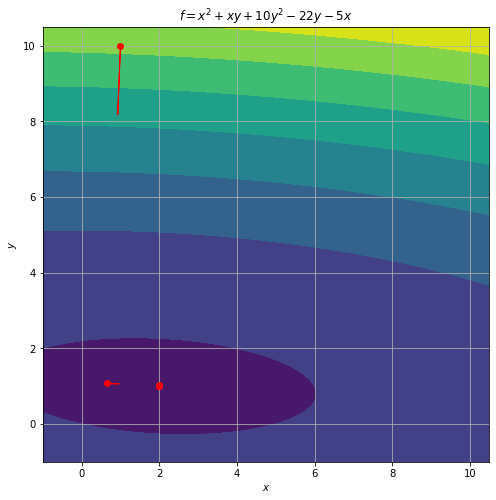

In [0]:
steepest_descent(1, 10, 100);

Starting point: x0=[10, 10]
Eps: 0.0001

x,y=[10. 10.] f=930.0
x,y=[8.74677714 0.57576408] f=28.45653770574053
x,y=[2.37595381 1.42294803] f=-13.910799424120679
x,y=[2.31705957 0.98006336] f=-15.90181963617713
x,y=[2.01766766 1.01987612] f=-15.995386089803112
x,y=[2.01489997 0.99906309] f=-15.999783172861903
x,y=[2.00083028 1.00093406] f=-15.999989810376494
x,y=[2.00070021 0.99995597] f=-15.999999521146528
x,y=[2.00003902 1.0000439 ] f=-15.999999977496653
x,y=[2.00003291 0.99999793] f=-15.999999998942474

Appr.min: -15.999999998942474 at x*=[2.00003291 0.99999793]
Found after 10 iterations


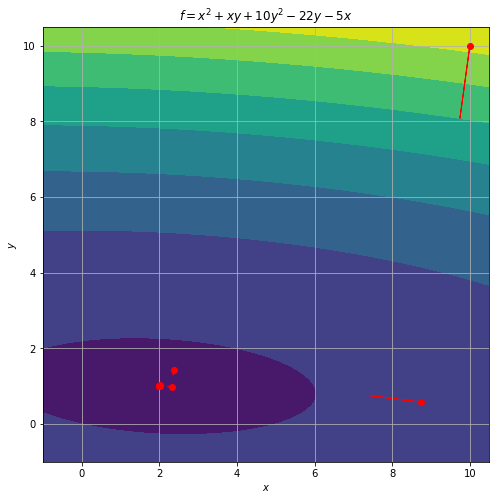

In [0]:
steepest_descent(10, 10, 100);

Starting point: x0=[10, 1]
Eps: 0.0001

x,y=[10.  1.] f=48.0
x,y=[ 7.5  -0.25] f=23.0
x,y=[6.875 1.   ] f=7.765625
x,y=[5.3515625  0.23828125] f=-1.517822265625
x,y=[4.97070312 1.        ] f=-7.174922943115234
x,y=[4.0423584  0.53582764] f=-10.62221866846085
x,y=[3.81027222 1.        ] f=-12.722914501093332
x,y=[3.24456215 0.71714497] f=-14.003026024103747
x,y=[3.10313463 1.        ] f=-14.78309398343822
x,y=[2.75840506 0.82763521] f=-15.258447896157666
x,y=[2.67222267 1.        ] f=-15.54811668672108
x,y=[2.46215308 0.89496521] f=-15.724633605970656
x,y=[2.40963569 1.        ] f=-15.832198603638371
x,y=[2.28162454 0.93599442] f=-15.897746024092129
x,y=[2.24962175 1.        ] f=-15.937688983431144
x,y=[2.17161495 0.9609966 ] f=-15.962029224278353
x,y=[2.15211325 1.        ] f=-15.97686155854462
x,y=[2.10457786 0.9762323 ] f=-15.985900012238126
x,y=[2.09269401 1.        ] f=-15.991407819957608
x,y=[2.06372713 0.98551656] f=-15.99476414028667
x,y=[2.05648541 1.        ] f=-15.99680939798

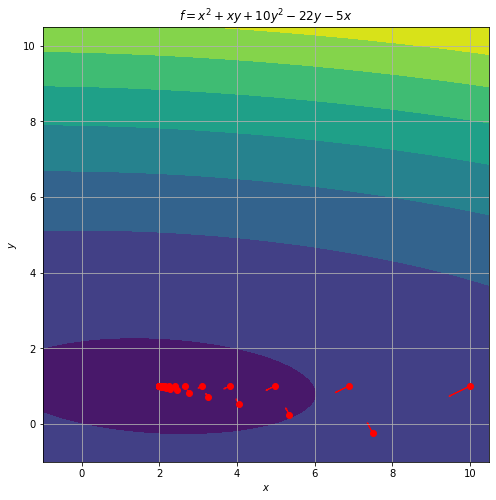

In [0]:
steepest_descent(10, 1, 100);

###Question 10

In [0]:
def f_n(point):
  return 1/4*(point.T[0] - 1)**2 + sum([(2*point.T[i-1] - xi - 1)**2 for i, xi in enumerate(point.T[2:])])

In [0]:
def df3(point):
  x1, x2, x3 = point.T
  dx1 = -1/2 + 16*x1**3 + x1*(-15/2 - 8*x2)
  dx2 = 2 - 4*x1**2 + 16*x2**3 - 2*x2*(3 + 4*x3)
  dx3 = 2 - 4*x2**2 + 2*x3
  return dx1, dx2, dx3

In [0]:
def df_n(x):
  dx1 = -1/2 + 16*x[0]**3 + x[0]*(-15/2 - 8*x[1])
  dx2 = []
  for i in range(1, len(x)-1):
    dx2 += [2 - 4*x[i-1]**2 + 16*x[i]**3 - 2*x[i]*(3 + 4*x[i+1])]
  dx3 = 2 - 4*x[-2]**2 + 2*x[-1]
  return np.r_[dx1, dx2, dx3]

In [0]:
def f_gamma(gamma, x, grad):
  y = x - gamma * grad
  return f_n(y)

In [0]:
def steepest_descent_n(x0, iters, eps=1e-6, log=False, is_alpha=False, alpha=0.1):
    u = np.empty((iters, len(x0)))
    df_t = np.empty((iters-1, len(x0)))
    tau_t = np.empty(iters-1)
    u[0] = x0
    for t in range(1, iters):
        df_t[t-1] = df_n(u[t-1])

        if is_alpha:
          tau_t[t-1] = alpha
        else:
          sol = minimize_scalar(f_gamma, args=(u[t-1], df_t[t-1]))
          tau_t[t-1] = sol["x"]
        #print (tau_t[t-1], u[t-1], df_t[t-1])

        u[t] = u[t-1] - tau_t[t-1]*df_t[t-1]
        if np.linalg.norm(u[t] - u[t-1]) < eps:
            break

    print ('Starting point: x0={}'.format(x0))
    print ('Eps: {}\n'.format(eps))

    if log:
      for tt in range(t):
        print ("x,y,z={}, f={}".format(u[tt], f_n(u[tt])))
        
    print ('\nAppr.min: {} at x*={}'.format(f_n(u[t-1]), u[t-1]))
    print ('Found after {} iterations'.format(t))
    return u[t-1], f_n(u[t-1]), t

####n=3:

####1.

In [0]:
steepest_descent_n([-1.5, 1, 1], 3, log=True);

Starting point: x0=[-1.5, 1, 1]
Eps: 1e-06

x,y,z=[-1.5  1.   1. ], f=1.5625
x,y,z=[1.  1.4 1. ], f=0.0

Appr.min: 0.0 at x*=[1.  1.4 1. ]
Found after 2 iterations


$f(x^1) < f(x^0)$

####2.

In [0]:
steepest_descent_n([-1.5, 1, 1], 20, log=True, is_alpha=True, alpha=0.1);

Starting point: x0=[-1.5, 1, 1]
Eps: 1e-06

x,y,z=[-1.5  1.   1. ], f=1.5625
x,y,z=[1.625 1.5   1.   ], f=0.09765625
x,y,z=[-2.021875 -0.94375   1.5     ], f=2.5329321289062503
x,y,z=[11.26284487  0.13759414  1.35626563], f=26.458421417612783
x,y,z=[-2.26493743e+03  5.09059439e+01  8.92585359e-01], f=1283618.1247527106
x,y,z=[1.85902985e+10 1.84102474e+06 1.03708012e+03], f=8.639979991097403e+19
x,y,z=[-1.02796677e+31  1.28255811e+20  1.35574884e+12], f=2.6417891870670305e+61
x,y,z=[1.73802975e+93 3.88930257e+61 6.57982125e+39], f=7.551868564972467e+185
x,y,z=[-8.40023825e+279  1.11416743e+186  6.05066981e+122], f=inf
x,y,z=[nan nan inf], f=nan
x,y,z=[nan nan nan], f=nan
x,y,z=[nan nan nan], f=nan
x,y,z=[nan nan nan], f=nan
x,y,z=[nan nan nan], f=nan
x,y,z=[nan nan nan], f=nan
x,y,z=[nan nan nan], f=nan
x,y,z=[nan nan nan], f=nan
x,y,z=[nan nan nan], f=nan
x,y,z=[nan nan nan], f=nan

Appr.min: nan at x*=[nan nan nan]
Found after 19 iterations


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  


In [0]:
steepest_descent_n([-1.5, 1, 1], 10, log=True, is_alpha=True, alpha=0.5);

Starting point: x0=[-1.5, 1, 1]
Eps: 1e-06

x,y,z=[-1.5  1.   1. ], f=1.5625
x,y,z=[14.125  3.5    1.   ], f=43.06640625
x,y,z=[-22280.171875     83.03125      23.5     ], f=124113161.28082275
x,y,z=[8.84800910e+13 9.88240789e+08 1.37873770e+04], f=1.9571816244955165e+27
x,y,z=[-5.54149146e+42  7.93636837e+27  1.95323971e+18], f=7.677031905129934e+84
x,y,z=[1.36135062e+129 5.74172181e+085 1.25971886e+056], f=4.633188750030314e+257
x,y,z=[           -inf 2.19223529e+258 6.59347386e+171], f=inf
x,y,z=[nan nan inf], f=nan
x,y,z=[nan nan nan], f=nan

Appr.min: nan at x*=[nan nan nan]
Found after 9 iterations


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  


In [0]:
steepest_descent_n([-1.5, 1, 1], 10, log=True, is_alpha=True, alpha=1.0);

Starting point: x0=[-1.5, 1, 1]
Eps: 1e-06

x,y,z=[-1.5  1.   1. ], f=1.5625
x,y,z=[29.75  6.    1.  ], f=206.640625
x,y,z=[-4.19608375e+05  1.72250000e+02  1.41000000e+02], f=44018026496.97266
x,y,z=[1.18209512e+18 7.04203178e+11 1.18537250e+05], f=3.493372200728511e+35
x,y,z=[-2.64287887e+55  1.94197830e+33  1.98360847e+24], f=1.7462021868225362e+110
x,y,z=[2.95360056e+167 2.79392350e+111 1.50851189e+067], f=inf
x,y,z=[           -inf             nan 3.12240341e+223], f=inf
x,y,z=[nan nan nan], f=nan
x,y,z=[nan nan nan], f=nan

Appr.min: nan at x*=[nan nan nan]
Found after 9 iterations


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


####3. The algorithms do not converge, too big step sizes

In [0]:
steepest_descent_n([-1.5, 1, 1], 10000);

Starting point: x0=[-1.5, 1, 1]
Eps: 1e-06


Appr.min: 0.0 at x*=[1.  1.4 1. ]
Found after 2 iterations


####I used scipy.minimize_scalar for $\alpha$ choosing. It took two iterations to converge.

####n = 10:

In [0]:
f_n(np.r_[-1.5, 1, 1, 1, 1, 1, 1, 1, 1, 1])

26.5625

####1.

In [0]:
steepest_descent_n([-1.5, 1, 1, 1, 1, 1, 1, 1, 1, 1], 3, log=True)

Starting point: x0=[-1.5, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Eps: 1e-06

x,y,z=[-1.5  1.   1.   1.   1.   1.   1.   1.   1.   1. ], f=26.5625
x,y,z=[0.94118188 1.3905891  1.         1.         1.         1.
 1.         1.         1.         1.        ], f=0.6249425604264317

Appr.min: 0.6249425604264317 at x*=[0.94118188 1.3905891  1.         1.         1.         1.
 1.         1.         1.         1.        ]
Found after 2 iterations


(array([0.94118188, 1.3905891 , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ]),
 0.6249425604264317,
 2)

$f(x^1) < f(x^0)$

####2.

In [0]:
steepest_descent_n([-1.5, 1, 1, 1, 1, 1, 1, 1, 1, 1], 20, log=True, is_alpha=True, alpha=0.1);

Starting point: x0=[-1.5, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Eps: 1e-06

x,y,z=[-1.5  1.   1.   1.   1.   1.   1.   1.   1.   1. ], f=26.5625
x,y,z=[1.625 1.5   1.    1.    1.    1.    1.    1.    1.    1.   ], f=2.66015625
x,y,z=[-2.021875 -0.94375   1.5       1.        1.        1.        1.
  1.        1.        1.      ], f=55.17250244140626
x,y,z=[11.26284487  0.13759414 -1.64373437  1.5         1.          1.
  1.          1.          1.          1.        ], f=466.2813787217812
x,y,z=[-2.26493743e+03  5.05757180e+01  2.31094795e+00 -9.19254922e-01
  1.50000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00], f=21813872.39480116
x,y,z=[ 1.85902991e+10  1.84516239e+06  1.00521282e+03  6.05154600e-01
 -1.66198816e+00  1.50000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00], f=1.4687967066846567e+21
x,y,z=[-1.02796687e+31  1.28188353e+20  1.36022454e+12  4.04180735e+05
  2.63812020e+00 -8.95118148e-01  1.50000000e+00  1.00000000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  


In [0]:
steepest_descent_n([-1.5, 1, 1, 1, 1, 1, 1, 1, 1, 1], 10, log=True, is_alpha=True, alpha=0.5);

Starting point: x0=[-1.5, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Eps: 1e-06

x,y,z=[-1.5  1.   1.   1.   1.   1.   1.   1.   1.   1. ], f=26.5625
x,y,z=[14.125  3.5    1.     1.     1.     1.     1.     1.     1.     1.   ], f=757.12890625
x,y,z=[-2.22801719e+04  8.30312500e+01  2.35000000e+01  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00], f=2109944583.277893
x,y,z=[ 8.84800910e+13  9.88240789e+08 -8.98476230e+04  1.10350000e+03
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00], f=3.3272087619940066e+28
x,y,z=[-5.54149146e+42  7.93636837e+27  1.95904214e+18  5.39523582e+09
  2.43542350e+06  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00], f=1.3050954238720888e+86
x,y,z=[ 1.36135062e+129  5.74172181e+085  6.58238678e+055  7.67569097e+036
 -5.73444391e+019  1.18625752e+013  1.00000000e+000  1.00000000e+000
  1.00000000e+000  1.00000000e+000], f=7.8764

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


In [0]:
steepest_descent_n([-1.5, 1, 1, 1, 1, 1, 1, 1, 1, 1], 10, log=True, is_alpha=True, alpha=1.0);

Starting point: x0=[-1.5, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Eps: 1e-06

x,y,z=[-1.5  1.   1.   1.   1.   1.   1.   1.   1.   1. ], f=26.5625
x,y,z=[29.75  6.    1.    1.    1.    1.    1.    1.    1.    1.  ], f=3612.890625
x,y,z=[-4.19608375e+05  1.72250000e+02  1.41000000e+02  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00], f=748306332554.7852
x,y,z=[ 1.18209512e+18  7.04203178e+11 -4.47307428e+07  7.95210000e+04
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00], f=5.938732741240076e+36
x,y,z=[-2.64287887e+55  1.94197830e+33  3.41559295e+24 -4.23731059e+13
  2.52943578e+10  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00], f=2.9685437175983116e+111
x,y,z=[ 2.95360056e+167  2.79392350e+111 -6.37555940e+074  4.66651019e+049
 -2.58927935e+032  2.55921814e+021  1.00000000e+000  1.00000000e+000
  1.00000000e+000  1.00000000e+000], f=inf
x,y,z=[      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  


####3. The algorithms with $\alpha = 0.1, 0.5, 1.0$ do not converge, too big step sizes

In [0]:
steepest_descent_n([-1.5, 1, 1, 1, 1, 1, 1, 1, 1, 1], 10000);

Starting point: x0=[-1.5, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Eps: 1e-06


Appr.min: 4.906173870762485e-11 at x*=[1.00000053 1.00000082 1.00000108 1.00000106 1.00000106 1.00000082
 1.00000071 1.00000059 1.00000108 1.0000036 ]
Found after 15 iterations


I used scipy.minimize_scalar for  α  choosing. It took 15 iterations to converge.